### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

### Import Data

In [4]:
df = pd.read_csv('loan_data.csv')

In [5]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Exploratory Data Analysis

Text(0.5, 0, 'FICO')

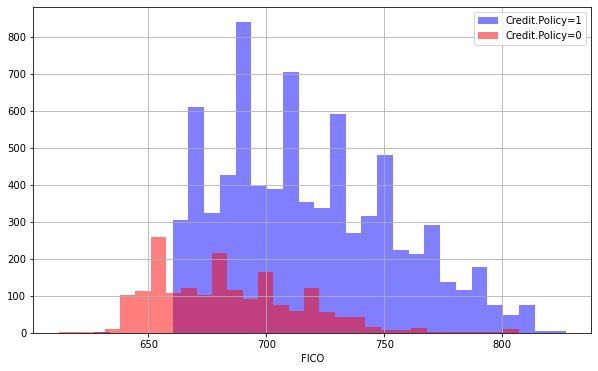

In [28]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

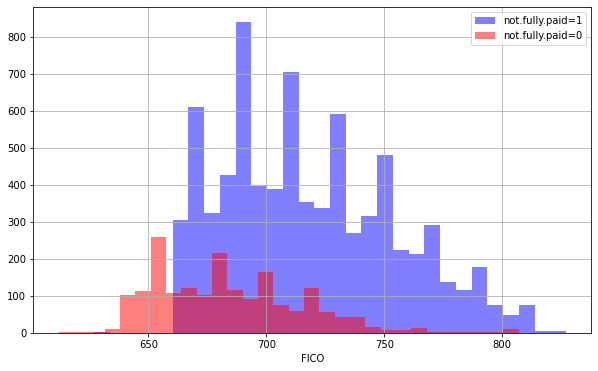

In [29]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

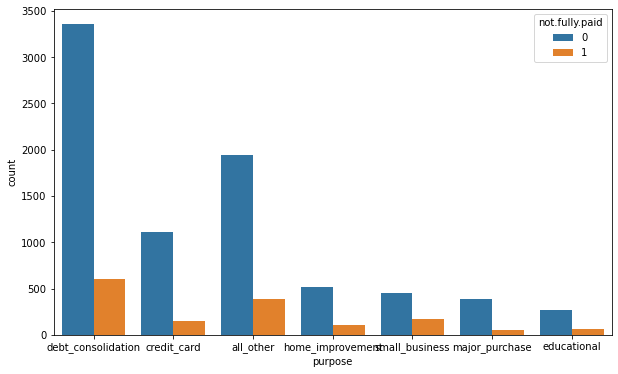

In [38]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, hue = 'not.fully.paid', x = 'purpose')

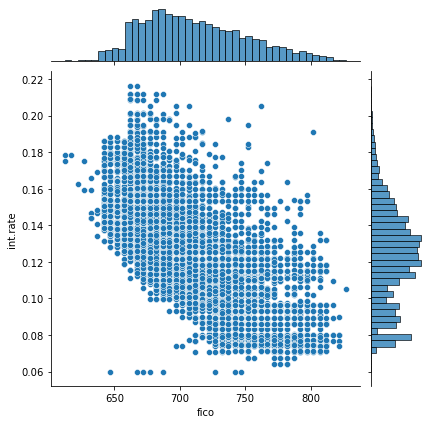

In [40]:
sns.jointplot(data = df, x = 'fico', y = 'int.rate')

### Setting up the Data

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [45]:
cat_feats = ['purpose']

In [46]:
final_data = pd.get_dummies(df, columns = cat_feats, drop_first=True)

In [48]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

### Train Test Split

In [49]:
from sklearn.model_selection import train_test_split

In [51]:
X = final_data.drop('not.fully.paid', axis =1)
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Train Decision Model

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dtree = DecisionTreeClassifier()

In [54]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
dtree_pred = dtree.predict(X_test)

### Evaluation

In [56]:
from sklearn.metrics import confusion_matrix, classification_report

In [57]:
print(confusion_matrix(y_test, dtree_pred))
print(classification_report(y_test, dtree_pred))

[[2210  440]
 [ 398  113]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2650
           1       0.20      0.22      0.21       511

    accuracy                           0.73      3161
   macro avg       0.53      0.53      0.53      3161
weighted avg       0.74      0.73      0.74      3161



### Train Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rfc = RandomForestClassifier(n_estimators=600)

In [65]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

In [66]:
rfc_pred = rfc.predict(X_test)

In [70]:
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[2636   14]
 [ 501   10]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2650
           1       0.42      0.02      0.04       511

    accuracy                           0.84      3161
   macro avg       0.63      0.51      0.47      3161
weighted avg       0.77      0.84      0.77      3161

